In [ ]:
%matplotlib inline
import torch
import numpy as np

# For creating Tensors whose functionality is same as Numpy

In [ ]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

print(f"Numpy np_array value: \n {np_array} \n")
print(f"Tensor x_np value: \n {x_np} \n")

np.multiply(np_array, 2, out=np_array)

print(f"Numpy np_array after * 2 operation: \n {np_array} \n")
print(f"Tensor x_np value after modifying numpy array: \n {x_np} \n")

Numpy np_array value: 
 [[1 2]
 [3 4]] 

Tensor x_np value: 
 tensor([[1, 2],
        [3, 4]]) 

Numpy np_array after * 2 operation: 
 [[2 4]
 [6 8]] 

Tensor x_np value after modifying numpy array: 
 tensor([[2, 4],
        [6, 8]]) 



In [ ]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.0960, 0.9472],
        [0.2337, 0.2687]]) 



In [ ]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.5350, 0.0106, 0.0381],
        [0.5028, 0.0534, 0.5677]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  print("GPU is available")
  tensor = tensor.to('cuda')
else:
  print("CPU is available")

CPU is available


In [ ]:
tensor = torch.ones(4, 4)
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [ ]:
#torch.stack is also used but it's functionality differs
t1 = torch.cat([tensor, tensor, tensor],dim=1)
print(t1)
t2=torch.stack([tensor,tensor,tensor])
print(t2)

tensor([[6., 5., 6., 6., 6., 5., 6., 6., 6., 5., 6., 6.],
        [6., 5., 6., 6., 6., 5., 6., 6., 6., 5., 6., 6.],
        [6., 5., 6., 6., 6., 5., 6., 6., 6., 5., 6., 6.],
        [6., 5., 6., 6., 6., 5., 6., 6., 6., 5., 6., 6.]])
tensor([[[6., 5., 6., 6.],
         [6., 5., 6., 6.],
         [6., 5., 6., 6.],
         [6., 5., 6., 6.]],

        [[6., 5., 6., 6.],
         [6., 5., 6., 6.],
         [6., 5., 6., 6.],
         [6., 5., 6., 6.]],

        [[6., 5., 6., 6.],
         [6., 5., 6., 6.],
         [6., 5., 6., 6.],
         [6., 5., 6., 6.]]])


In [ ]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[36., 25., 36., 36.],
        [36., 25., 36., 36.],
        [36., 25., 36., 36.],
        [36., 25., 36., 36.]])

In [ ]:
agg = tensor.sum()
agg_item = agg.item()  
print('To get the item directly',agg.item())
print(agg_item, type(agg_item))

To get the item directly 12.0
12.0 <class 'float'>


In [ ]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


##To show that tensor and numpy share the same memory allocation

In [ ]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [ ]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [ ]:
n = np.ones(5)
t = torch.from_numpy(n)

In [ ]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


#Dataset And DataLoader

In [ ]:
%matplotlib inline
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



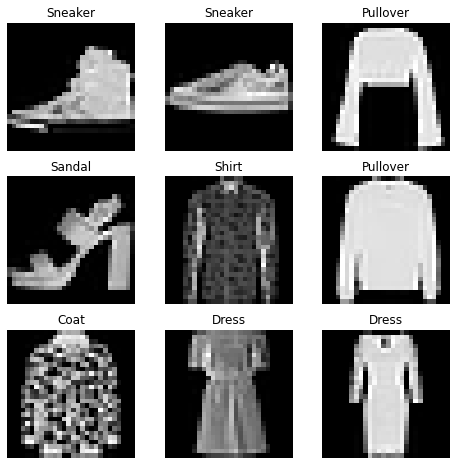

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
#Dataloader to load data to be prepared for preprocessing or training using Torch
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


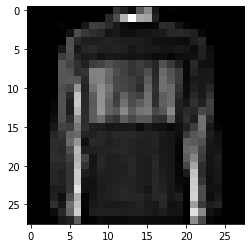

Label: 2


In [ ]:
# Display image and label and iterate using Dataloader.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [ ]:
#Normalization and Transforms
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [ ]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

#Building a basic Neural Network using Pytorch

In [ ]:
%matplotlib inline
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


Class of Neural Network with forward defined

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


To use the model, we pass it the input data. This executes the model's `forward`, along with some background operations. However, do not call `model.forward()` directly! Calling the model on the input returns a 10-dimensional tensor with raw predicted values for each class.

We get the prediction densities by passing it through an instance of the `nn.Softmax`.

In [ ]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X) 
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([2])


## Weight and Bias


The `nn.Linear` module randomly initializes the ${weights}$  and ${ bias}$ for each layer and internally stores the values in Tensors.

In [ ]:
print(f"First Linear weights: {model.linear_relu_stack[0].weight} \n")

print(f"First Linear weights: {model.linear_relu_stack[0].bias} \n")

First Linear weights: Parameter containing:
tensor([[ 0.0168,  0.0110,  0.0316,  ..., -0.0294, -0.0027,  0.0002],
        [-0.0341, -0.0158,  0.0312,  ...,  0.0258, -0.0203,  0.0121],
        [ 0.0057,  0.0207,  0.0035,  ..., -0.0172,  0.0212,  0.0270],
        ...,
        [-0.0003,  0.0039, -0.0071,  ..., -0.0297, -0.0093, -0.0107],
        [ 0.0280, -0.0013,  0.0252,  ...,  0.0044, -0.0314, -0.0278],
        [ 0.0021, -0.0121,  0.0128,  ..., -0.0110,  0.0266, -0.0329]],
       requires_grad=True) 

First Linear weights: Parameter containing:
tensor([ 1.2079e-02,  3.4287e-02,  2.4139e-02, -4.6284e-03,  2.4799e-02,
        -2.4463e-03,  2.1363e-02, -3.4164e-02,  3.8867e-03,  2.7969e-02,
        -1.3657e-02,  7.3104e-03, -5.2946e-03,  3.2504e-02,  1.7017e-02,
         1.5199e-02, -1.1198e-02, -1.4991e-02, -8.0602e-03,  2.6595e-04,
        -3.3053e-02,  3.5414e-02, -7.9128e-03,  2.9196e-03,  2.3240e-02,
        -8.9407e-03,  1.4395e-02,  1.5735e-02,  1.1992e-02,  2.1706e-02,
        -5.

#Model layers for understanding consider a batch

Let's break down the layers in the FashionMNIST model. To illustrate it, we 
will take a sample minibatch of 3 images of size **28x28** and see what happens to it as 
we pass it through the network. 






In [ ]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


### nn.Flatten

We initialize the `nn.Flatten` layer to convert each 2D 28x28 image into a contiguous array of 784 pixel values (the minibatch dimension (at dim=0) is maintained). Each of the pixels are pass to the input layer of the neural network.  

<img alt="Diagram showing how pixels in image are flatten" src="images/4-model-3.png" />

In [ ]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


### nn.Linear 

The linear layer is a module that applies a linear transformation on the input using it's stored weights and biases.  The gayscale value of each pixel in the input layer will be connected to neurons in the hidden layer for calculation.    The calculation used for the transformation is ${{weight * input + bias}} $.


In [ ]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


### nn.ReLU

Non-linear activations are what create the complex mappings between the model's inputs and outputs.
They are applied after linear transformations to introduce *nonlinearity*, helping neural networks
learn a wide variety of phenomena. In this model, we use `nn.ReLU` between our linear layers, but there's other activations to introduce non-linearity in your model.

The ReLU activation function takes the output from the linear layer calculation and replaces the negative values with zeros.

Linear output: ${ x = {weight * input + bias}} $.  
ReLU:  $f(x)= 
\begin{cases}
    0, & \text{if } x < 0\\
    x, & \text{if } x\geq 0\\
\end{cases}
$

In [ ]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.9052,  0.5784,  0.8418,  0.3120,  0.0061, -0.1681, -0.0350,  0.0789,
          0.7431, -0.0612, -0.4511, -0.0062,  0.0559,  0.2640, -0.2221,  0.0462,
          0.1693, -0.0560,  0.0281,  0.0017],
        [-0.9002,  0.4725,  0.3152,  0.1025, -0.1726, -0.2258,  0.0025, -0.0322,
          0.3515,  0.0162, -0.1121,  0.0247, -0.0163,  0.1656,  0.2649,  0.3949,
          0.4185,  0.0910, -0.0378, -0.1696],
        [-0.9860,  0.7751,  0.5390,  0.0393,  0.0649, -0.1196, -0.1647, -0.2724,
          0.9401, -0.1233, -0.3997, -0.1191, -0.0957,  0.4698,  0.0364,  0.2211,
          0.5944,  0.0513, -0.1150, -0.0519]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.5784, 0.8418, 0.3120, 0.0061, 0.0000, 0.0000, 0.0789, 0.7431,
         0.0000, 0.0000, 0.0000, 0.0559, 0.2640, 0.0000, 0.0462, 0.1693, 0.0000,
         0.0281, 0.0017],
        [0.0000, 0.4725, 0.3152, 0.1025, 0.0000, 0.0000, 0.0025, 0.0000, 0.3515,
         0.0162, 0.0000, 0.0247, 0.0000, 0.1656, 0.26

### nn.Sequential

`nn.Sequential` is an ordered 
container of modules. The data is passed through all the modules in the same order as defined. You can use
sequential containers to put together a quick network like `seq_modules`.

In [ ]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

### nn.Softmax

The last linear layer of the neural network returns `logits` - raw values in \[`-infty`, `infty`], which are passed to the
`nn.Softmax` module. The Softmax activation function is used to calculate the probability of the output from the neural network.  It is only used on the output layer of a neural network.  The results are scaled to values \[0, 1\] representing the model's predicted densities for each class. `dim` parameter indicates the dimension along which the result values must sum to 1.  The node with the highest probability predicts the desired output.

<img alt="Diagram shows softmax formula" src="images/4-model-4.png" />

In [ ]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

## Model parameters

Many layers inside a neural network are *parameterized*, i.e. have associated weights 
and biases that are optimized during training. Subclassing `nn.Module` automatically 
tracks all fields defined inside your model object, and makes all parameters 
accessible using your model's `parameters()` or `named_parameters()` methods.

In this example, we iterate over each parameter, and print its size and a preview of its values.


In [ ]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0168,  0.0110,  0.0316,  ..., -0.0294, -0.0027,  0.0002],
        [-0.0341, -0.0158,  0.0312,  ...,  0.0258, -0.0203,  0.0121]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0121, 0.0343], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0058,  0.0320,  0.0016,  ..., -0.0273,  0.0201,  0.0186],
        [-0.0307,  0.0423, -0.0360,  ...,  0.0034,  0.0426,  0.0039]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu

# Automatic differentiation with ``torch.autograd``


In [ ]:
%matplotlib inline
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

## Tensors, Functions and Computational graph

This code defines the following **computational graph**:

<img alt="Diagram showing a computational graph with two parameters 'w' and 'b' to compute the gradients of loss." src="images/5-autograd-1.png" />

In this network, `w` and `b` are **parameters**, which we need to
optimize. Thus, we need to be able to compute the gradients of loss
function with respect to those variables. In order to do that, we set
the `requires_grad` property of those tensors.

> **Note:** You can set the value of `requires_grad` when creating a tensor, or later by using `x.requires_grad_(True)` method.

A function that we apply to tensors to construct computational graph is
in fact an object of class `Function`. This object knows how to
compute the function in the *forward* direction, and also how to compute
its derivative during the *backward propagation* step. A reference to
the backward propagation function is stored in `grad_fn` property of a
tensor. 

In [ ]:
print('Gradient function for z =',z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x7f47036ef610>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7f47036efd10>


## Computing gradients

To optimize weights of parameters in the neural network, we need to
compute the derivatives of our loss function with respect to parameters,
namely, we need $\frac{\partial loss}{\partial w}$ and
$\frac{\partial loss}{\partial b}$ under some fixed values of
`x` and `y`. To compute those derivatives, we call
`loss.backward()`, and then retrieve the values from `w.grad` and
`b.grad`:

In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.2051, 0.1475, 0.3209],
        [0.2051, 0.1475, 0.3209],
        [0.2051, 0.1475, 0.3209],
        [0.2051, 0.1475, 0.3209],
        [0.2051, 0.1475, 0.3209]])
tensor([0.2051, 0.1475, 0.3209])


> **Note:** We can only obtain the `grad` properties for the leaf nodes of the computational graph, which have `requires_grad` property set to ``True``. For all other nodes in our graph, gradients will not be available. In addition, we can only perform gradient calculations using ``backward`` once on a given graph, for performance reasons. If we need to do several ``backward`` calls on the same graph, we need to pass ``retain_graph=True`` to the ``backward`` call.

## Disabling gradient tracking

By default, all tensors with `requires_grad=True` are tracking their
computational history and support gradient computation. However, there
are some cases when we do not need to do that, for example, when we have
trained the model and just want to apply it to some input data, i.e. we
only want to do *forward* computations through the network. We can stop
tracking computations by surrounding our computation code with
`torch.no_grad()` block:

In [ ]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


In [ ]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


There are reasons you might want to disable gradient tracking:
  - To mark some parameters in your neural network at **frozen parameters**. This is
    a very common scenario for fine tuning a pre-trained network.
  - To **speed up computations** when you are only doing forward pass, because computations on tensors that do
    not track gradients would be more efficient.



More on Computational Graphs
----------------------------
Conceptually, autograd keeps a record of data (tensors) and all executed
operations (along with the resulting new tensors) in a directed acyclic
graph (DAG) consisting of
[Function](https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
objects. In this DAG, leaves are the input tensors, roots are the output
tensors. By tracing this graph from roots to leaves, you can
automatically compute the gradients using the chain rule.

In a forward pass, autograd does two things simultaneously:

- run the requested operation to compute a resulting tensor
- maintain the operation’s *gradient function* in the DAG.

The backward pass kicks off when `.backward()` is called on the DAG
root. `autograd` then:

- computes the gradients from each `.grad_fn`,
- accumulates them in the respective tensor’s `.grad` attribute
- using the chain rule, propagates all the way to the leaf tensors.

**DAGs are dynamic in PyTorch**

  An important thing to note is that the graph is recreated from scratch; after each
  `.backward()` call, autograd starts populating a new graph. This is
  exactly what allows you to use control flow statements in your model;
  you can change the shape, size and operations at every iteration if
  needed.



## Optional reading: Tensor gradients and Jacobian products

In many cases, we have a scalar loss function, and we need to compute
the gradient with respect to some parameters. However, there are cases
when the output function is an arbitrary tensor. In this case, PyTorch
allows you to compute so-called **Jacobian product**, and not the actual
gradient.

For a vector function $\vec{y}=f(\vec{x})$, where
$\vec{x}=\langle x_1,\dots,x_n\rangle$ and
$\vec{y}=\langle y_1,\dots,y_m\rangle$, a gradient of
$\vec{y}$ with respect to $\vec{x}$ is given by **Jacobian
matrix**, whose element $J_{ij}$ contains $\frac{\partial y_{i}}{\partial x_{j}}$.

Instead of computing the Jacobian matrix itself, PyTorch allows you to
compute **Jacobian Product** $v^T\cdot J$ for a given input vector
$v=(v_1 \dots v_m)$. This is achieved by calling `backward` with
$v$ as an argument. The size of $v$ should be the same as
the size of the original tensor, with respect to which we want to
compute the product:




In [ ]:
inp = torch.eye(5, requires_grad=True)
out = (inp+1).pow(2)
out.backward(torch.ones_like(inp), retain_graph=True)
print("First call\n", inp.grad)
out.backward(torch.ones_like(inp), retain_graph=True)
print("\nSecond call\n", inp.grad)
inp.grad.zero_()
out.backward(torch.ones_like(inp), retain_graph=True)
print("\nCall after zeroing gradients\n", inp.grad)

First call
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])

Second call
 tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.],
        [4., 4., 4., 4., 8.]])

Call after zeroing gradients
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])


Notice that when we call `backward` for the second time with the same
argument, the value of the gradient is different. This happens because
when doing `backward` propagation, PyTorch **accumulates the
gradients**, i.e. the value of computed gradients is added to the
`grad` property of all leaf nodes of computational graph. If you want
to compute the proper gradients, you need to zero out the `grad`
property before. In real-life training an *optimizer* helps us to do
this.



> **Note:** previously we were calling `backward()` function without parameters. This is equivalent to calling `backward(torch.tensor(1.0))`, which is a useful way to compute the gradients in case of a scalar-valued function, such as loss during neural network training.



# Optimizing the model parameters

Now that we have a model and data it's time to train, validate and test our model by optimizing its parameters on our data. Training a model is an iterative process; in each iteration (called an *epoch*). The model makes a guess about the output, calculates the error in its guess (*loss*), collects the derivatives of the error with respect to its parameters (as we saw in the previous module), and **optimizes** these parameters using gradient descent. 

## Prerequisite code 

We will load the code from the previous modules on **Datasets & DataLoaders** and **Build Model**

In [1]:
%matplotlib inline
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## Setting hyperparameters 

Hyperparameters are adjustable parameters that let you control the model optimization process. 
Different hyperparameter values can impact model training and the level of accuracy.

We define the following hyperparameters for training:
 - **Number of Epochs** - the number times the entire training dataset is pass through the network. 
 - **Batch Size** - the number of data samples seen by the model in each epoch. Iterates are the number of batches needs to compete an epoch.
 - **Learning Rate** - the size of steps the model match as it searchs for best weights that will produce a higher model accuracy. Smaller values means the model will take a longer time to find the best weights, while larger values may result in the model step over and misses the best weights which yields unpredictable behavior during training.

In [2]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

## Add an optimization loop

Once we set our hyperparameters, we can then train and optimize our model with an optimization loop. Each 
iteration of the optimization loop is called an **epoch**. 

Each epoch consists of two main parts:
 - **The Train Loop** - iterate over the training dataset and try to converge to optimal parameters.
 - **The Validation/Test Loop** - iterate over the test dataset to check if model performance is improving.

Let's briefly familiarize ourselves with some of the concepts used in the training loop. Jump ahead to 
see the `full-impl-label` of the optimization loop.

### Add a loss function

When presented with some training data, our untrained network is likely not to give the correct 
answer. **Loss function** measures the degree of dissimilarity of obtained result to the target value, 
and it is the loss function that we want to minimize during training. To calculate the loss we make a 
prediction using the inputs of our given data sample and compare it against the true data label value.

Common loss functions include:
- `nn.MSELoss` (Mean Square Error) used for regression tasks
- `nn.NLLLoss` (Negative Log Likelihood) used for classification
- `nn.CrossEntropyLoss` combines `nn.LogSoftmax` and `nn.NLLLoss`

We pass our model's output logits to `nn.CrossEntropyLoss`, which will normalize the logits and compute the prediction error.

In [3]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

### Optimization pass

Optimization is the process of adjusting model parameters to reduce model error in each training step. **Optimization algorithms** define how this process is performed (in this example we use Stochastic Gradient Descent).
All optimization logic is encapsulated in  the ``optimizer`` object. Here, we use the SGD optimizer; additionally, there are many different optimizers
available in PyTorch such as `ADAM' and 'RMSProp`, that work better for different kinds of models and data.

We initialize the optimizer by registering the model's parameters that need to be trained, and passing in the learning rate hyperparameter.



In [4]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Inside the training loop, optimization happens in three steps:
 * Call `optimizer.zero_grad()` to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.
 * Back-propagate the prediction loss with a call to `loss.backwards()`. PyTorch deposits the gradients of the loss w.r.t. each parameter. 
 * Once we have our gradients, we call ``optimizer.step()`` to adjust the parameters by the gradients collected in the backward pass.

## Full implementation

We define `train_loop` that loops over our optimization code, and `test_loop` that 
evaluates the model's performance against our test data.

In [5]:
  def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):        
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

We initialize the loss function and optimizer, and pass it to `train_loop` and `test_loop`.
Feel free to increase the number of epochs to track the model's improving performance.

In [6]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.302894  [    0/60000]
loss: 2.298675  [ 6400/60000]
loss: 2.294028  [12800/60000]
loss: 2.289277  [19200/60000]
loss: 2.277253  [25600/60000]
loss: 2.274674  [32000/60000]
loss: 2.276048  [38400/60000]
loss: 2.274072  [44800/60000]
loss: 2.262195  [51200/60000]
loss: 2.238617  [57600/60000]
Test Error: 
 Accuracy: 33.4%, Avg loss: 0.035347 

Epoch 2
-------------------------------
loss: 2.267262  [    0/60000]
loss: 2.253585  [ 6400/60000]
loss: 2.258059  [12800/60000]
loss: 2.243898  [19200/60000]
loss: 2.223118  [25600/60000]
loss: 2.226726  [32000/60000]
loss: 2.224074  [38400/60000]
loss: 2.232971  [44800/60000]
loss: 2.208039  [51200/60000]
loss: 2.156401  [57600/60000]
Test Error: 
 Accuracy: 36.1%, Avg loss: 0.034371 

Epoch 3
-------------------------------
loss: 2.225460  [    0/60000]
loss: 2.195181  [ 6400/60000]
loss: 2.208164  [12800/60000]
loss: 2.168579  [19200/60000]
loss: 2.140432  [25600/60000]
loss: 2.164111  [32000/600

You may have noticed that the model is initially not very good (that's OK!). Try running the loop for more `epochs` or adjusting the `learning_rate` to a bigger number. It might also be the case that the model configuration we chose might not be the optimal one for this kind of problem (it isn't). Later courses will delve more into the model shapes that work for vision problems.


Saving Models
-------------

When you are satisfied with the model's performance, you can use `torch.save` to save it. PyTorch models store the learned parameters in an internal state dictionary, called `state_dict`. These can be persisted wit the `torch.save` method:

In [7]:
torch.save(model.state_dict(), "data/model.pth")

print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


# Load the model

In this unit we will look at how to load a model along with it's persisted parameter states and inference model predictions.

In [9]:
!pip install onnxruntime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 13.5 MB/s 
     |████████████████████████████████| 46 kB 3.3 MB/s 
     |████████████████████████████████| 86 kB 5.7 MB/s 


In [10]:
%matplotlib inline
import torch
import onnxruntime
from torch import nn
import torch.onnx as onnx
import torchvision.models as models
from torchvision import datasets
from torchvision.transforms import ToTensor

To load the model, we will define the model class which contains the state and parameters of the neural network used to train the model.

In [11]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

When loading model weights, we needed to instantiate the model class first, because the class defines the structure of a network. Next, we load the parameters using the `load_state_dict()` method.

In [12]:
model = NeuralNetwork()
model.load_state_dict(torch.load('data/model.pth'))
model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)

> **Note:** Be sure to call `model.eval()` method before inferencing to set the dropout and batch normalization layers to evaluation mode. Failing to do this will yield inconsistent inference results.


## Model Inference

Optimizing a model to run on a variety of platforms and programming languages is difficult. It's very time consuming to maximize performance across all the different combinations of frameworks and hardware. The **Open Neural Network Exchange (ONNX)** runtime provides a solution for you to train once and acelerate inference on any hardward, cloud or edge devices is needed. 

ONNX  is a common format supported by a number of vendors to share neural networks and other machine learning models. You can use ONNX format to do inference on your model on other programming languages and frameworks such as Java, JavaScript, C# and ML.NET

## Exporting the model to ONNX

PyTorch also has native ONNX export support. Given the dynamic nature of the PyTorch execution graph, however, the export process must traverse the execution graph to produce a persisted ONNX model. For this reason, a test variable of the appropriate size should be passed in to the export routine (in our case, we will create a dummy zero tensor of the correct size.  You can get the size from the `shape` fuction on your training dataset. e.g tensor.shape):

In [13]:
input_image = torch.zeros((1,28,28))
onnx_model = 'data/model.onnx'
onnx.export(model, input_image, onnx_model)

We will use our test dataset as sample data for inference from the ONNX model to make predictions.


In [14]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
x, y = test_data[0][0], test_data[0][1]

We need to create inference session with `onnxruntime.InferenceSession`.  To inference the onnx model, use run and pass in the list of outputs you want returned (leave empty if you want all of them) and a map of the input values. The result is a list of the outputs.

In [15]:
session = onnxruntime.InferenceSession(onnx_model, None)
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

result = session.run([output_name], {input_name: x.numpy()})
predicted, actual = classes[result[0][0].argmax(0)], classes[y]
print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


There are a lot of things you can do with ONNX model, including running inference on different platforms and in different programming languages. 

This unit runs through the API for common tasks in machine learning. Refer to the links in each section to dive deeper.

## Working with data
PyTorch has two primitives to work with data: ``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``. ``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around the ``Dataset``.



In [16]:
%matplotlib inline
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

PyTorch offers domain-specific libraries such as `TorchText`, `TorchVision`, and `TorchAudio`, all of which include datasets. For this tutorial, we  will be using a TorchVision dataset.

The ``torchvision.datasets`` module contains ``Dataset`` objects for many real-world vision data like CIFAR and COCO. In this tutorial, we'll use the **FashionMNIST** dataset. Every TorchVision ``Dataset`` includes two arguments: ``transform`` and ``target_transform`` to modify the samples and labels respectively.

In [17]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

We pass the ``Dataset`` as an argument to ``DataLoader``. This wraps an iterable over our dataset, and supports automatic batching, sampling, shuffling and multiprocess data loading. Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features and labels.



Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


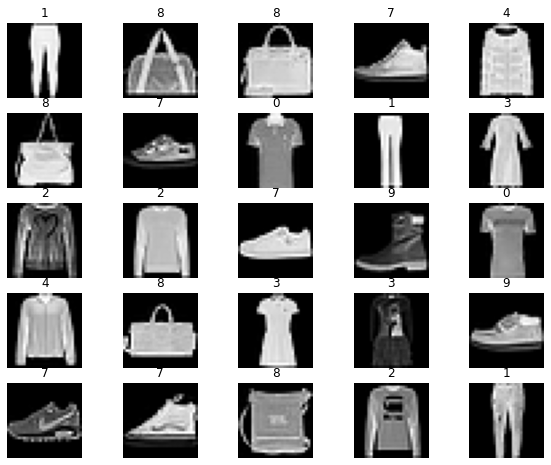

In [18]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break
    
# Display sample data
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    idx = torch.randint(len(test_data), size=(1,)).item()
    img, label = test_data[idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Creating models
To define a neural network in PyTorch, we create a class that inherits from `nn.Module`. We define the layers of the network in the ``__init__`` function and specify how data will pass through the network in the ``forward`` function. To accelerate operations in the neural network, we move it to the GPU if available.



In [19]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


## Optimizing the Model Parameters
To train a model, we need a loss function and an optimizer.  We'll be using `nn.CrossEntropyLoss` for loss and `Stochastic Gradient Descent` for optimization.

In [20]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and back-propagates the prediction error to adjust the model's parameters. 



In [21]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

We can also check the model's performance against the test dataset to ensure it is learning.


In [22]:
def test(dataloader, model):
    size = len(dataloader.dataset)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

The training process is conducted over several iterations (*epochs*). During each epoch, the model learns parameters to make better predictions. We print the model's accuracy and loss at each epoch; we'd like to see the accuracy increase and the loss decrease with every epoch.



In [23]:
epochs = 15
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model)
print("Done!")

Epoch 1
-------------------------------
loss: 2.304708  [    0/60000]
loss: 2.302100  [ 6400/60000]
loss: 2.288014  [12800/60000]
loss: 2.278096  [19200/60000]
loss: 2.289710  [25600/60000]
loss: 2.263016  [32000/60000]
loss: 2.263656  [38400/60000]
loss: 2.250203  [44800/60000]
loss: 2.235881  [51200/60000]
loss: 2.210616  [57600/60000]
Test Error: 
 Accuracy: 38.3%, Avg loss: 0.034839 

Epoch 2
-------------------------------
loss: 2.232926  [    0/60000]
loss: 2.239871  [ 6400/60000]
loss: 2.190241  [12800/60000]
loss: 2.172994  [19200/60000]
loss: 2.221560  [25600/60000]
loss: 2.164762  [32000/60000]
loss: 2.165353  [38400/60000]
loss: 2.146943  [44800/60000]
loss: 2.114514  [51200/60000]
loss: 2.065635  [57600/60000]
Test Error: 
 Accuracy: 40.8%, Avg loss: 0.032786 

Epoch 3
-------------------------------
loss: 2.122397  [    0/60000]
loss: 2.140553  [ 6400/60000]
loss: 2.033595  [12800/60000]
loss: 1.998714  [19200/60000]
loss: 2.115202  [25600/60000]
loss: 2.016469  [32000/600

The accuracy will initially not be very good (that's OK!). Try running the loop for more `epochs` or adjusting the `learning_rate` to a bigger number. It might also be the case that the model configuration we chose might not be the optimal one for this kind of problem (it isn't). Later courses will delve more into the model shapes that work for vision problems.

Saving Models
-------------
A common way to save a model is to serialize the internal state dictionary (containing the model parameters).



In [24]:
torch.save(model.state_dict(), "data/model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


Loading Models
----------------------------

The process for loading a model includes re-creating the model structure and loading
the state dictionary into it. 



In [25]:
model = NeuralNetwork()
model.load_state_dict(torch.load("data/model.pth"))

<All keys matched successfully>

This model can now be used to make predictions.



In [26]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Sandal", Actual: "Ankle boot"
